In [27]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from keras.src.models import Sequential
from keras.src.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, Input
from keras.src.optimizers import SGD, Adam
from keras.src.callbacks import ReduceLROnPlateau, EarlyStopping
from keras.src.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [4]:
data = pd.read_csv(r"C:\Users\admin\Desktop\bitirme_projesi\A_Z Handwritten Data.csv").astype('float32')

data.head(10)

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
X = data.drop('0',axis = 1)
y = data['0']

In [6]:
train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = 0.2)

train_x = np.reshape(train_x.values, (train_x.shape[0], 28,28))
test_x = np.reshape(test_x.values, (test_x.shape[0], 28,28))


In [7]:
word_dict = {0:'A',1:'B',2:'C',3:'D',4:'E',5:'F',6:'G',7:'H',8:'I',9:'J',10:'K',11:'L',12:'M',13:'N',14:'O',15:'P',16:'Q',17:'R',18:'S',19:'T',20:'U',21:'V',22:'W',23:'X', 24:'Y',25:'Z'}

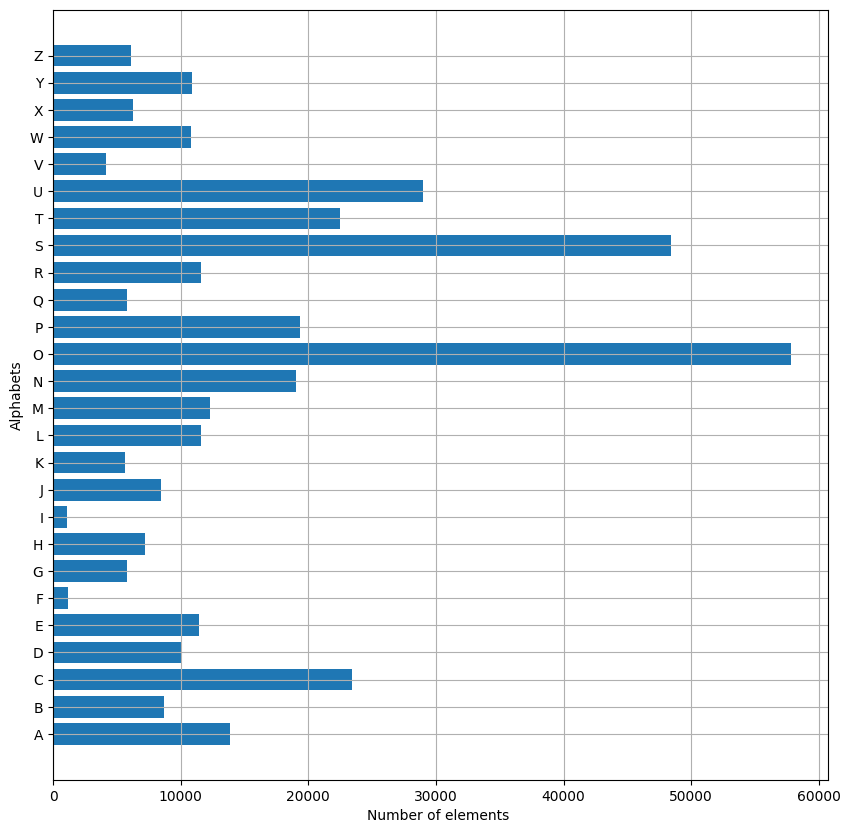

In [51]:
y_int = np.int_(y)
count = np.zeros(26, dtype='int')
for i in y_int:
    count[i] +=1

alphabets = []
for i in word_dict.values():
    alphabets.append(i)

fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.barh(alphabets, count)

plt.xlabel("Number of elements ")
plt.ylabel("Alphabets")
plt.grid()
plt.show()

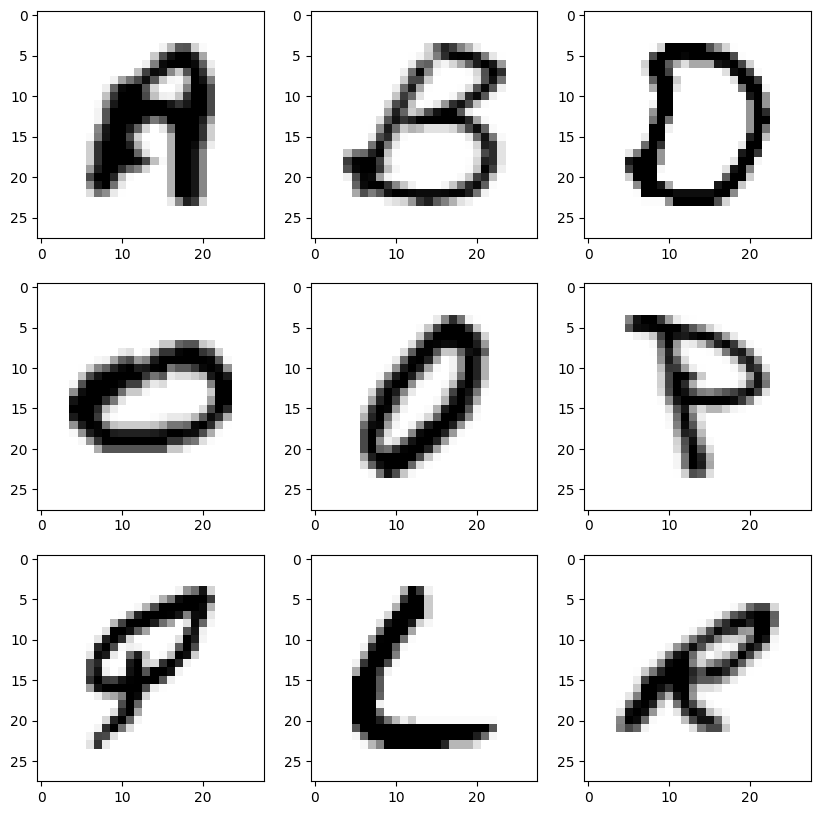

In [9]:
shuff = shuffle(train_x[:100])

fig, ax = plt.subplots(3,3, figsize = (10,10))
axes = ax.flatten()

for i in range(9):
    _, shu = cv2.threshold(shuff[i], 30, 200, cv2.THRESH_BINARY)
    axes[i].imshow(np.reshape(shuff[i], (28,28)), cmap="Greys")
plt.show()

In [10]:
train_X = train_x.reshape(train_x.shape[0],train_x.shape[1],train_x.shape[2],1)

test_X = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2],1)

In [20]:
train_yOHE = to_categorical(train_y, num_classes = 26)
print("New shape of train labels: ", train_yOHE.shape)

test_yOHE = to_categorical(test_y, num_classes = 26)
print("New shape of test labels: ", test_yOHE.shape)

New shape of train labels:  (297960, 26)
New shape of test labels:  (74490, 26)


In [28]:
model = Sequential()

model.add(Input(shape=(28, 28, 1)))

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='valid'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64, activation="relu"))
model.add(Dense(128, activation="relu"))

model.add(Dense(26, activation="softmax"))

In [52]:
model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=1, min_lr=0.0001)
early_stop = EarlyStopping(monitor='val_loss', min_delta=0, patience=2, verbose=0, mode='auto')

history = model.fit(train_X, train_yOHE, epochs=30, callbacks=[reduce_lr, early_stop],   validation_data = (test_X,test_yOHE))

Epoch 1/30
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 84s 9ms/step - accuracy: 0.9781 - loss: 0.0797 - val_accuracy: 0.9803 - val_loss: 0.0724 - learning_rate: 0.0010
Epoch 2/30
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 77s 8ms/step - accuracy: 0.9823 - loss: 0.0629 - val_accuracy: 0.9821 - val_loss: 0.0664 - learning_rate: 0.0010
Epoch 3/30
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 73s 8ms/step - accuracy: 0.9843 - loss: 0.0568 - val_accuracy: 0.9838 - val_loss: 0.0635 - learning_rate: 0.0010
Epoch 4/30
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 70s 8ms/step - accuracy: 0.9860 - loss: 0.0518 - val_accuracy: 0.9852 - val_loss: 0.0599 - learning_rate: 0.0010
Epoch 5/30
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 70s 8ms/step - accuracy: 0.9863 - loss: 0.0500 - val_accuracy: 0.9824 - val_loss: 0.0772 - learning_rate: 0.0010
Epoch 6/30
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 71s 8ms/step - accuracy: 0.9928 - loss: 0.0259 - val_accuracy: 0.9916 - val_loss: 0.0374 - learning_rate: 2.0000e-04
Epoch 7/30
9312/9312 ━━━━━━━━━━━━━━━━━━━━ 80s 9ms/step - accuracy:

In [54]:
model.summary()
model.save(r'model_hand.keras')

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 411,536 (1.57 MB)

 Trainable params: 137,178 (535.85 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 274,358 (1.05 MB)

In [55]:
print("The validation accuracy is :", history.history['val_accuracy'])
print("The training accuracy is :", history.history['accuracy'])
print("The validation loss is :", history.history['val_loss'])
print("The training loss is :", history.history['loss'])

The validation accuracy is : [0.9803463816642761, 0.9820915460586548, 0.9837696552276611, 0.9852194786071777, 0.9824405908584595, 0.991623044013977, 0.9920660257339478, 0.994227409362793, 0.9947375655174255, 0.9950597286224365]
The training accuracy is : [0.9791347980499268, 0.9823063611984253, 0.98430997133255, 0.9855450391769409, 0.9862464666366577, 0.994046151638031, 0.9964861273765564, 0.9980098009109497, 0.998640775680542, 0.999009907245636]
The validation loss is : [0.07241840660572052, 0.06635185331106186, 0.06345837563276291, 0.05994828790426254, 0.0772184208035469, 0.037430308759212494, 0.039383869618177414, 0.03577149659395218, 0.03968828544020653, 0.04082345589995384]
The training loss is : [0.07568435370922089, 0.0635555163025856, 0.05737469345331192, 0.05455348268151283, 0.05164226517081261, 0.021763306111097336, 0.012951510958373547, 0.007154043763875961, 0.0050965286791324615, 0.0037017613649368286]


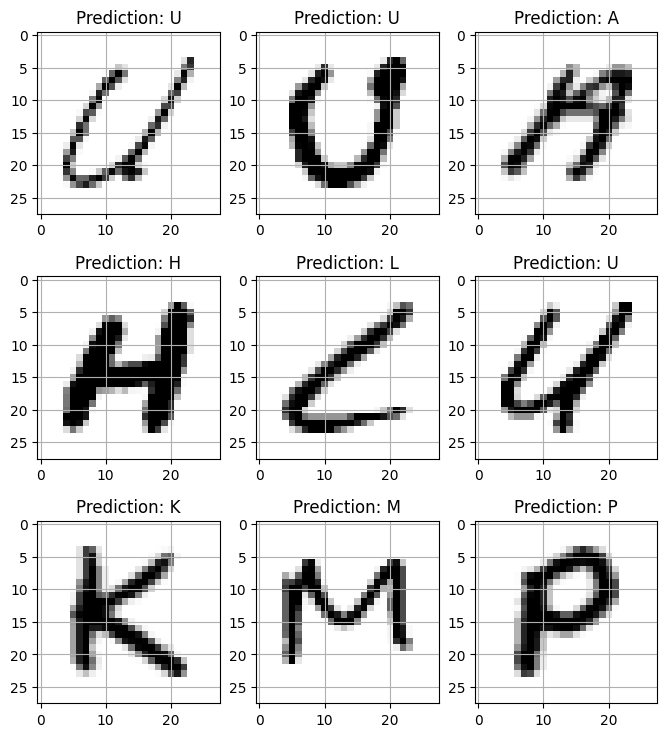

In [34]:
fig, axes = plt.subplots(3,3, figsize=(8,9))
axes = axes.flatten()

for i,ax in enumerate(axes):
    img = np.reshape(test_X[i], (28,28))
    ax.imshow(img, cmap="Greys")
    
    pred = word_dict[np.argmax(test_yOHE[i])]
    ax.set_title("Prediction: "+pred)
    ax.grid()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


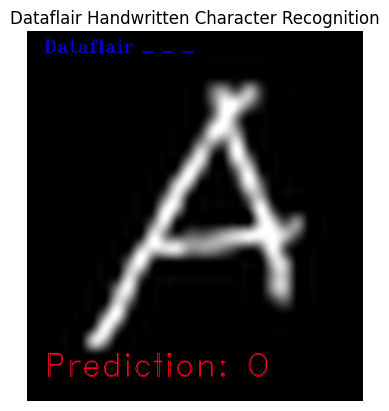

In [63]:
# Load the image
img = cv2.imread('output_img/A/0_3.png')
img_copy = img.copy()

# Preprocess the image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for matplotlib
img = cv2.resize(img, (400, 440))
img_copy = cv2.GaussianBlur(img_copy, (7, 7), 0)
img_gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
_, img_thresh = cv2.threshold(img_gray, 100, 255, cv2.THRESH_BINARY_INV)

# Prepare the image for prediction
img_final = cv2.resize(img_thresh, (28, 28))
img_final = np.reshape(img_final, (1, 28, 28, 1))

# Prediction
img_pred = word_dict[np.argmax(model.predict(img_final))]

# Add text to the image
cv2.putText(img, "Dataflair _ _ _ ", (20, 25), cv2.FONT_HERSHEY_TRIPLEX, 0.7, color=(0, 0, 230))
cv2.putText(img, "Prediction: " + img_pred, (20, 410), cv2.FONT_HERSHEY_DUPLEX, 1.3, color=(255, 0, 30))

# Display the image using matplotlib
plt.imshow(img)  # Matplotlib expects RGB images
plt.axis('off')  # Turn off axes
plt.title('Dataflair Handwritten Character Recognition')
plt.show()